In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-risk-profiling/sample_submission_updated.csv
/kaggle/input/financial-risk-profiling/test_updated.csv
/kaggle/input/financial-risk-profiling/train_updated.csv


Column Name | Description
ProfileID | Unique identifier assigned to each applicant profile.
ApplicantYears | Age of the applicant (in years).
AnnualEarnings | Applicant’s annual income, representing financial stability.
RequestedSum | Total loan amount requested by the applicant.
TrustMetric | Credit score of the applicant, indicating financial trustworthiness.
WorkDuration | Total number of months the applicant has been employed.
ActiveAccounts | Number of active credit lines or financial accounts held by the applicant.
OfferRate | Interest rate offered for the applicant’s requested loan.
RepayPeriod | Duration of the loan repayment period (in months).
DebtFactor | Debt-to-Income (DTI) ratio, reflecting financial burden.
QualificationLevel | Highest educational qualification attained by the applicant.
WorkCategory | Type of employment (e.g., salaried, self-employed, contractual).
RelationshipStatus | Marital status of the applicant.
OwnsProperty | Indicates if the applicant owns property (1 = Yes, 0 = No).
FamilyObligation | Indicates if the applicant has dependents or family responsibilities.
FundUseCase | Purpose or reason for taking the loan (e.g., education, medical, business).
JointApplicant | Specifies whether the loan application includes a co-signer or co-applicant.
RiskFlag | Target variable — 1 if the applicant is likely to default, 0 otherwi

In [2]:
train_df = pd.read_csv("/kaggle/input/financial-risk-profiling/train_updated.csv") 

In [3]:
train_df.head()

,ProfileID,ApplicantYears,AnnualEarnings,RequestedSum,TrustMetric,WorkDuration,ActiveAccounts,OfferRate,RepayPeriod,DebtFactor,QualificationLevel,WorkCategory,RelationshipStatus,OwnsProperty,FamilyObligation,FundUseCase,JointApplicant,RiskFlag
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0


In [4]:
train_df.isnull().sum() / train_df.shape[0]

ProfileID             0.0
ApplicantYears        0.0
AnnualEarnings        0.0
RequestedSum          0.0
TrustMetric           0.0
WorkDuration          0.0
ActiveAccounts        0.0
OfferRate             0.0
RepayPeriod           0.0
DebtFactor            0.0
QualificationLevel    0.0
WorkCategory          0.0
RelationshipStatus    0.0
OwnsProperty          0.0
FamilyObligation      0.0
FundUseCase           0.0
JointApplicant        0.0
RiskFlag              0.0
dtype: float64

No null values to take care of of!!!

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ProfileID           204277 non-null  object 
 1   ApplicantYears      204277 non-null  int64  
 2   AnnualEarnings      204277 non-null  int64  
 3   RequestedSum        204277 non-null  int64  
 4   TrustMetric         204277 non-null  int64  
 5   WorkDuration        204277 non-null  int64  
 6   ActiveAccounts      204277 non-null  int64  
 7   OfferRate           204277 non-null  float64
 8   RepayPeriod         204277 non-null  int64  
 9   DebtFactor          204277 non-null  float64
 10  QualificationLevel  204277 non-null  object 
 11  WorkCategory        204277 non-null  object 
 12  RelationshipStatus  204277 non-null  object 
 13  OwnsProperty        204277 non-null  object 
 14  FamilyObligation    204277 non-null  object 
 15  FundUseCase         204277 non-nul

In [6]:
train_df.shape

(204277, 18)

In [7]:
train_df.nunique()

ProfileID             204277
ApplicantYears            52
AnnualEarnings        105214
RequestedSum          138850
TrustMetric              550
WorkDuration             120
ActiveAccounts             4
OfferRate               2301
RepayPeriod                5
DebtFactor                81
QualificationLevel         4
WorkCategory               4
RelationshipStatus         3
OwnsProperty               2
FamilyObligation           2
FundUseCase                5
JointApplicant             2
RiskFlag                   2
dtype: int64

In [8]:
target = "RiskFlag"
id_col = "ProfileID"

In [9]:
num_cols = [
    "ApplicantYears", "AnnualEarnings", "RequestedSum", "TrustMetric",
    "WorkDuration", "ActiveAccounts", "OfferRate", "RepayPeriod", "DebtFactor"
]

cat_cols = [
    "QualificationLevel", "WorkCategory", "RelationshipStatus",
    "OwnsProperty", "FamilyObligation", "FundUseCase", "JointApplicant"
]


In [13]:
assert(len(num_cols)+len(cat_cols) == 16)

In [15]:
df_encoded = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [17]:
df_encoded.head()

,ProfileID,ApplicantYears,AnnualEarnings,RequestedSum,TrustMetric,WorkDuration,ActiveAccounts,OfferRate,RepayPeriod,DebtFactor,...,WorkCategory_Unemployed,RelationshipStatus_Married,RelationshipStatus_Single,OwnsProperty_Yes,FamilyObligation_Yes,FundUseCase_Business,FundUseCase_Education,FundUseCase_Home,FundUseCase_Other,JointApplicant_Yes
0,DRIRC89L0T,-1.699838,1.413785,1.151487,1.711544,-0.967182,-0.449530,-0.454811,1.415720,1.339989,...,False,False,True,True,False,True,False,False,False,False
1,TS0FIUNHNU,0.234120,-0.649831,-1.715866,1.094714,-0.851727,-0.449530,0.939092,-0.000645,0.993538,...,True,False,False,False,True,False,True,False,False,False
2,I0YR284A1V,-1.166333,0.046770,-0.458437,-0.762072,-1.515594,-0.449530,1.621727,-1.417010,-0.219039,...,False,True,False,False,False,False,False,False,True,True
3,WB1T7NQV8A,0.634249,-0.839783,1.440049,-0.258537,1.370784,0.445809,0.143437,1.415720,-1.431615,...,False,False,True,True,False,False,False,False,False,True
4,J6GU9M4G1Z,0.367496,0.845753,-1.488613,1.673779,-1.717640,1.341148,1.656386,-1.417010,-1.691453,...,False,False,True,False,True,False,True,False,False,True


In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop([id_col, target], axis=1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
input_dim = X_train.shape[1]
print(input_dim)

24


In [20]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y)
pd.Series(mi, index=X.columns).sort_values(ascending=False).head(15)

JointApplicant_Yes                0.028036
OwnsProperty_Yes                  0.027869
FamilyObligation_Yes              0.026894
ApplicantYears                    0.015623
RelationshipStatus_Married        0.013728
RelationshipStatus_Single         0.011726
OfferRate                         0.008121
ActiveAccounts                    0.007930
QualificationLevel_Master's       0.007681
QualificationLevel_PhD            0.007218
QualificationLevel_High School    0.007213
WorkCategory_Self-employed        0.007053
AnnualEarnings                    0.007036
WorkCategory_Part-time            0.006406
WorkCategory_Unemployed           0.006228
dtype: float64

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RiskClassifier(nn.Module):
    def __init__(self, input_dim):
        super(RiskClassifier, self).__init__()
        
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.net(x)

In [22]:
import torch.optim as optim
from sklearn.metrics import roc_auc_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RiskClassifier(input_dim=X_train.shape[1]).to(device)
criterion = nn.BCELoss()  # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)  # L2 regularization

In [25]:
from torch.utils.data import TensorDataset, DataLoader

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=256, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=256, shuffle=False)

In [26]:
X_train.dtypes.value_counts()

float32    24
Name: count, dtype: int64

In [27]:
X_train.dtypes.unique()

array([dtype('float32')], dtype=object)

In [28]:
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=256, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=256, shuffle=False)

In [29]:
for xb, yb in train_loader:
    print(xb.shape, yb.shape)
    break

torch.Size([256, 24]) torch.Size([256, 1])


In [30]:
model = RiskClassifier(input_dim=X_train.shape[1]).to(device)
print(model)

RiskClassifier(
  (net): Sequential(
    (0): Linear(in_features=24, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): Linear(in_features=64, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


In [31]:
xb, yb = next(iter(train_loader))
xb, yb = xb.to(device), yb.to(device)

with torch.no_grad():
    preds = model(xb)
print(preds.shape, preds[:5])

torch.Size([256, 1]) tensor([[0.4878],
        [0.4781],
        [0.4498],
        [0.4420],
        [0.3896]])


In [32]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

model.train()
xb, yb = next(iter(train_loader))
xb, yb = xb.to(device), yb.to(device)

optimizer.zero_grad()
preds = model(xb)
loss = criterion(preds, yb)
loss.backward()
optimizer.step()

print("Single batch backprop successful, loss =", loss.item())


Single batch backprop successful, loss = 0.6448742151260376


In [33]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)

    avg_loss = train_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_loss:.4f}")

Epoch 1/3 | Train Loss: 0.3318
Epoch 2/3 | Train Loss: 0.3199
Epoch 3/3 | Train Loss: 0.3180


In [34]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            val_loss += loss.item() * xb.size(0)

    train_loss /= len(train_loader.dataset)
    val_loss   /= len(test_loader.dataset)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Epoch 01 | Train Loss: 0.3172 | Val Loss: 0.3150
Epoch 02 | Train Loss: 0.3163 | Val Loss: 0.3149
Epoch 03 | Train Loss: 0.3158 | Val Loss: 0.3144
Epoch 04 | Train Loss: 0.3156 | Val Loss: 0.3142
Epoch 05 | Train Loss: 0.3152 | Val Loss: 0.3149
Epoch 06 | Train Loss: 0.3151 | Val Loss: 0.3142
Epoch 07 | Train Loss: 0.3149 | Val Loss: 0.3137
Epoch 08 | Train Loss: 0.3147 | Val Loss: 0.3151
Epoch 09 | Train Loss: 0.3148 | Val Loss: 0.3138
Epoch 10 | Train Loss: 0.3143 | Val Loss: 0.3135


In [35]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        preds = model(xb).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(yb.numpy())

import numpy as np
y_pred = np.array(y_pred)
y_true = np.array(y_true)

print("AUC:", roc_auc_score(y_true, y_pred))
print("F1:", f1_score(y_true, (y_pred > 0.5).astype(int)))
print("Accuracy:", accuracy_score(y_true, (y_pred > 0.5).astype(int)))


AUC: 0.7538803090485604
F1: 0.0711022840119166
Accuracy: 0.8855247699236343


In [37]:
# Compute class weights
pos_weight = (train_df['RiskFlag'].value_counts()[0] / train_df['RiskFlag'].value_counts()[1])
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([pos_weight], device=device))

In [38]:
pos_weight

7.6000505199343245

In [39]:
import torch.nn as nn

class RiskClassifierWeighted(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)  # No Sigmoid here
        )

    def forward(self, x):
        return self.net(x)


In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RiskClassifierWeighted(input_dim=X_train.shape[1]).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([7.6], device=device))

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)


In [41]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item() * xb.size(0)
    avg_val_loss = val_loss / len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")


Epoch 1/5 | Train Loss: 1.0732 | Val Loss: 1.0460
Epoch 2/5 | Train Loss: 1.0528 | Val Loss: 1.0417
Epoch 3/5 | Train Loss: 1.0476 | Val Loss: 1.0450
Epoch 4/5 | Train Loss: 1.0460 | Val Loss: 1.0411
Epoch 5/5 | Train Loss: 1.0443 | Val Loss: 1.0399


In [42]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        probs = torch.sigmoid(logits).cpu().numpy()  # apply sigmoid manually
        y_pred.extend(probs)
        y_true.extend(yb.numpy())

import numpy as np
y_pred = np.array(y_pred)
y_true = np.array(y_true)

print("AUC:", roc_auc_score(y_true, y_pred))
print("F1:", f1_score(y_true, (y_pred > 0.5).astype(int)))
print("Accuracy:", accuracy_score(y_true, (y_pred > 0.5).astype(int)))


AUC: 0.7543203478966417
F1: 0.33819839197009266
Accuracy: 0.6836939494811044


In [43]:
import numpy as np
from sklearn.metrics import f1_score

best_thr, best_f1 = 0, 0
for t in np.linspace(0.1, 0.9, 17):  # step of 0.05
    f1 = f1_score(y_true, (y_pred > t).astype(int))
    if f1 > best_f1:
        best_f1, best_thr = f1, t
print(f"Best threshold: {best_thr:.2f}, Best F1: {best_f1:.3f}")


Best threshold: 0.65, Best F1: 0.369


In [44]:
import torch
import numpy as np
from sklearn.metrics import f1_score

num_epochs = 40
patience = 6
best_val_loss = np.inf
patience_counter = 0

train_f1s, val_f1s = [], []

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3)

for epoch in range(num_epochs):
    model.train()
    train_loss, y_true_train, y_pred_train = 0.0, [], []

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)

        probs = torch.sigmoid(logits).detach().cpu().numpy()
        y_true_train.extend(yb.cpu().numpy())
        y_pred_train.extend(probs)

    train_loss /= len(train_loader.dataset)
    train_f1 = f1_score(y_true_train, (np.array(y_pred_train) > 0.65).astype(int))
    train_f1s.append(train_f1)

    # Validation phase
    model.eval()
    val_loss, y_true_val, y_pred_val = 0.0, [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item() * xb.size(0)
            probs = torch.sigmoid(logits).cpu().numpy()
            y_true_val.extend(yb.cpu().numpy())
            y_pred_val.extend(probs)

    val_loss /= len(test_loader.dataset)
    val_f1 = f1_score(y_true_val, (np.array(y_pred_val) > 0.65).astype(int))
    val_f1s.append(val_f1)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Train F1: {train_f1:.3f} | Val F1: {val_f1:.3f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping.")
            break


Epoch 01 | Train Loss: 1.0430 | Val Loss: 1.0393 | Train F1: 0.360 | Val F1: 0.364
Epoch 02 | Train Loss: 1.0424 | Val Loss: 1.0386 | Train F1: 0.361 | Val F1: 0.364
Epoch 03 | Train Loss: 1.0402 | Val Loss: 1.0385 | Train F1: 0.362 | Val F1: 0.367
Epoch 04 | Train Loss: 1.0402 | Val Loss: 1.0394 | Train F1: 0.363 | Val F1: 0.356
Epoch 05 | Train Loss: 1.0399 | Val Loss: 1.0396 | Train F1: 0.362 | Val F1: 0.367
Epoch 06 | Train Loss: 1.0384 | Val Loss: 1.0381 | Train F1: 0.362 | Val F1: 0.364
Epoch 07 | Train Loss: 1.0383 | Val Loss: 1.0400 | Train F1: 0.363 | Val F1: 0.365
Epoch 08 | Train Loss: 1.0383 | Val Loss: 1.0388 | Train F1: 0.361 | Val F1: 0.365
Epoch 09 | Train Loss: 1.0369 | Val Loss: 1.0380 | Train F1: 0.365 | Val F1: 0.367
Epoch 10 | Train Loss: 1.0377 | Val Loss: 1.0386 | Train F1: 0.363 | Val F1: 0.367
Epoch 11 | Train Loss: 1.0356 | Val Loss: 1.0382 | Train F1: 0.366 | Val F1: 0.366
Epoch 12 | Train Loss: 1.0358 | Val Loss: 1.0389 | Train F1: 0.365 | Val F1: 0.364
Epoc

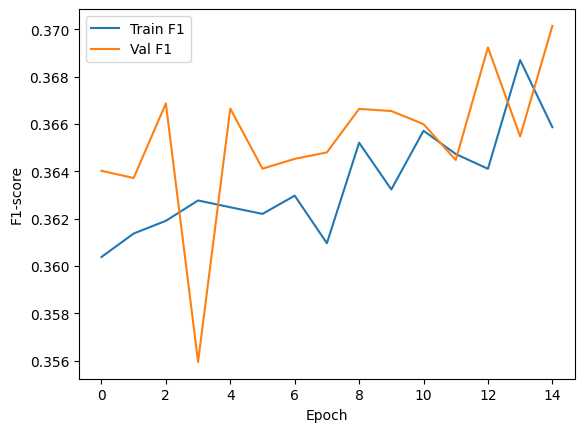

In [45]:
import matplotlib.pyplot as plt

plt.plot(train_f1s, label='Train F1')
plt.plot(val_f1s, label='Val F1')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()

In [47]:
df = pd.read_csv("/kaggle/input/financial-risk-profiling/train_updated.csv")


df = df.replace([np.inf, -np.inf], np.nan).fillna(0)
df = df.drop(columns=["ProfileID"])


df["LoanToIncome"] = df["RequestedSum"] / (df["AnnualEarnings"] + 1)
df["IncomePerAccount"] = df["AnnualEarnings"] / (df["ActiveAccounts"] + 1)
df["EMI_Burden"] = df["RequestedSum"] / (df["RepayPeriod"] + 1)
df["DebtStress"] = df["DebtFactor"] * df["RequestedSum"]


for col in ["AnnualEarnings", "RequestedSum"]:
    df[col] = np.log1p(df[col])


num_cols = [
    "ApplicantYears", "AnnualEarnings", "RequestedSum", "TrustMetric",
    "WorkDuration", "ActiveAccounts", "OfferRate", "RepayPeriod", "DebtFactor",
    "LoanToIncome", "IncomePerAccount", "EMI_Burden", "DebtStress"
]
cat_cols = [
    "QualificationLevel", "WorkCategory", "RelationshipStatus",
    "OwnsProperty", "FamilyObligation", "FundUseCase", "JointApplicant"
]


df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True).astype("float32")


scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

X = df_encoded.drop("RiskFlag", axis=1)
y = df_encoded["RiskFlag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_t  = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=256, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=256, shuffle=False)


In [48]:
class RiskNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(), nn.Dropout(0.25),
            nn.Linear(64, 32), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(32, 16), nn.ReLU(), nn.Dropout(0.1),
            nn.Linear(16, 1)
        )
    def forward(self, x):
        return self.net(x)

In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RiskNet(input_dim=X_train.shape[1]).to(device)

pos_weight = torch.tensor([7.6], device=device)  # imbalance factor
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3)


Epoch 01 | Train Loss: 1.0732 | Val Loss: 1.0368 | Train F1: 0.325 | Val F1: 0.340
Epoch 02 | Train Loss: 1.0519 | Val Loss: 1.0347 | Train F1: 0.336 | Val F1: 0.337
Epoch 03 | Train Loss: 1.0480 | Val Loss: 1.0340 | Train F1: 0.335 | Val F1: 0.337
Epoch 04 | Train Loss: 1.0478 | Val Loss: 1.0374 | Train F1: 0.338 | Val F1: 0.335
Epoch 05 | Train Loss: 1.0456 | Val Loss: 1.0354 | Train F1: 0.337 | Val F1: 0.342
Epoch 06 | Train Loss: 1.0448 | Val Loss: 1.0351 | Train F1: 0.338 | Val F1: 0.335
Epoch 07 | Train Loss: 1.0431 | Val Loss: 1.0354 | Train F1: 0.338 | Val F1: 0.334
Epoch 08 | Train Loss: 1.0420 | Val Loss: 1.0344 | Train F1: 0.339 | Val F1: 0.340
Epoch 09 | Train Loss: 1.0414 | Val Loss: 1.0347 | Train F1: 0.340 | Val F1: 0.345
Early stopping.


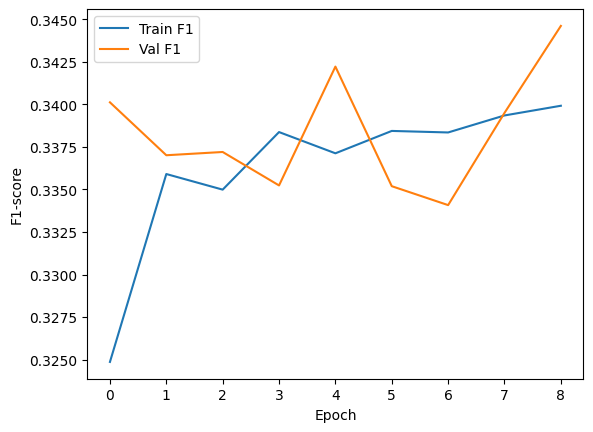

In [50]:
num_epochs = 40
patience = 6
best_val_loss = np.inf
patience_counter = 0
train_f1s, val_f1s = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, y_true_train, y_pred_train = 0.0, [], []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        y_true_train.extend(yb.cpu().numpy())
        y_pred_train.extend(probs)

    train_loss /= len(train_loader.dataset)
    train_f1 = f1_score(y_true_train, (np.array(y_pred_train) > 0.5).astype(int))
    train_f1s.append(train_f1)

    model.eval()
    val_loss, y_true_val, y_pred_val = 0.0, [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item() * xb.size(0)
            probs = torch.sigmoid(logits).cpu().numpy()
            y_true_val.extend(yb.cpu().numpy())
            y_pred_val.extend(probs)

    val_loss /= len(test_loader.dataset)
    val_f1 = f1_score(y_true_val, (np.array(y_pred_val) > 0.5).astype(int))
    val_f1s.append(val_f1)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Train F1: {train_f1:.3f} | Val F1: {val_f1:.3f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping.")
            break

# Plot F1 curves
plt.plot(train_f1s, label='Train F1')
plt.plot(val_f1s, label='Val F1')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings



print("Loading data...")
try:
    df_train = pd.read_csv('/kaggle/input/financial-risk-profiling/train_updated.csv')
    df_test = pd.read_csv('/kaggle/input/financial-risk-profiling/test_updated.csv')
except FileNotFoundError as e:
    print("Error: One or both files not found.")
    print(f"Details: {e}")
    exit()


test_profile_ids = df_test['ProfileID']

X_train_raw = df_train.drop(['ProfileID', 'RiskFlag'], axis=1)
y_train_full = df_train['RiskFlag']
X_test_raw = df_test.drop('ProfileID', axis=1)


binary_cols = ['OwnsProperty', 'FamilyObligation', 'JointApplicant']
nominal_cols = ['QualificationLevel', 'WorkCategory', 'RelationshipStatus', 'FundUseCase']
numeric_cols = [
    'ApplicantYears', 'AnnualEarnings', 'RequestedSum', 'TrustMetric',
    'WorkDuration', 'ActiveAccounts', 'OfferRate', 'RepayPeriod', 'DebtFactor'
]

Loading data...


In [2]:
def encode_binary(df, columns):
    df = df.copy()
    for col in columns:
        if col in df.columns:
            # Handle variations like "Yes"/"No"
            df[col] = df[col].map({'Yes': 1, 'No': 0})
            df[col] = df[col].fillna(0).astype(int)
    return df

print("Applying preprocessing and feature engineering...")

X_train_bin = encode_binary(X_train_raw, binary_cols)
X_test_bin = encode_binary(X_test_raw, binary_cols)

# Combine for consistent One-Hot Encoding
X_combined = pd.concat([X_train_bin, X_test_bin], ignore_index=True, sort=False)
X_combined_ohe = pd.get_dummies(X_combined, columns=nominal_cols, drop_first=True)

X_train_proc = X_combined_ohe.iloc[:len(X_train_bin)].copy()
X_test_proc = X_combined_ohe.iloc[len(X_train_bin):].copy()


Applying preprocessing and feature engineering...


In [3]:
# Feature Engineering Function
def add_features(df_raw, df_proc):
    eps = 1e-6 # Avoid division by zero
    df_proc['LoanToIncome'] = df_raw['RequestedSum'] / (df_raw['AnnualEarnings'] + eps)
    df_proc['IncomePerAccount'] = df_raw['AnnualEarnings'] / (df_raw['ActiveAccounts'] + 1)
    df_proc['EMI_Burden'] = df_raw['RequestedSum'] / (df_raw['RepayPeriod'] + 1)
    df_proc['DebtStress'] = df_raw['DebtFactor'] * df_raw['RequestedSum']
    return df_proc

X_train_proc = add_features(X_train_raw, X_train_proc)
X_test_proc = add_features(X_test_raw, X_test_proc)

# Add new features to numeric list for scaling
numeric_cols.extend(['LoanToIncome', 'IncomePerAccount', 'EMI_Burden', 'DebtStress'])

# Cleanup Global
X_train_proc = X_train_proc.replace([np.inf, -np.inf], np.nan)
X_test_proc = X_test_proc.replace([np.inf, -np.inf], np.nan)

train_medians = X_train_proc.median()
X_train_proc = X_train_proc.fillna(train_medians)
X_test_proc = X_test_proc.fillna(train_medians)

# Log Transform for Skewed features
skew_cols = ['AnnualEarnings', 'RequestedSum']
for col in skew_cols:
    if col in X_train_proc.columns:
        X_train_proc[col] = np.log1p(X_train_proc[col])
        X_test_proc[col] = np.log1p(X_test_proc[col])

# Scaling
scaler = StandardScaler()
X_train_proc[numeric_cols] = scaler.fit_transform(X_train_proc[numeric_cols])
X_test_proc[numeric_cols] = scaler.transform(X_test_proc[numeric_cols])

# Prepare Tensors
X_train_np = X_train_proc.astype(np.float32).values
y_train_np = y_train_full.astype(np.float32).values
X_test_np = X_test_proc.astype(np.float32).values

# Split Train/Val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_np, y_train_np, test_size=0.2, random_state=42, stratify=y_train_np
)

# --- 3. PyTorch Setup ---

class LoanDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1) if y is not None else None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

# Loaders
BATCH_SIZE = 1024
train_loader = DataLoader(LoanDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(LoanDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(LoanDataset(X_test_np), batch_size=BATCH_SIZE, shuffle=False)

# Model
class LoanRiskNN(nn.Module):
    def __init__(self, input_dim):
        super(LoanRiskNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dim = X_train.shape[1]
model = LoanRiskNN(input_dim).to(device)

# Training Config
pos_weight_val = 7.6000505199343245
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight_val).to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 20
history = {'train_loss': [], 'val_loss': [], 'train_f1': [], 'val_f1': []}

print(f"\nTraining on {device} for {EPOCHS} epochs...")

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    all_preds, all_targets = [], []
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
        
    train_loss = running_loss / len(train_loader.dataset)
    train_f1 = f1_score(all_targets, all_preds)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_preds, val_targets = [], []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
            
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(targets.cpu().numpy())
            
    val_loss = val_loss / len(val_loader.dataset)
    val_f1 = f1_score(val_targets, val_preds)
    
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_f1'].append(train_f1)
    history['val_f1'].append(val_f1)
    
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Train F1: {train_f1:.4f} | Val F1: {val_f1:.4f}")





Training on cuda for 20 epochs...
Epoch 01 | Train Loss: 1.0711 | Val Loss: 1.0357 | Train F1: 0.3154 | Val F1: 0.3403
Epoch 02 | Train Loss: 1.0481 | Val Loss: 1.0348 | Train F1: 0.3328 | Val F1: 0.3377
Epoch 03 | Train Loss: 1.0433 | Val Loss: 1.0349 | Train F1: 0.3353 | Val F1: 0.3376
Epoch 04 | Train Loss: 1.0422 | Val Loss: 1.0351 | Train F1: 0.3357 | Val F1: 0.3366
Epoch 05 | Train Loss: 1.0409 | Val Loss: 1.0348 | Train F1: 0.3380 | Val F1: 0.3380
Epoch 06 | Train Loss: 1.0392 | Val Loss: 1.0353 | Train F1: 0.3380 | Val F1: 0.3385
Epoch 07 | Train Loss: 1.0380 | Val Loss: 1.0352 | Train F1: 0.3379 | Val F1: 0.3387
Epoch 08 | Train Loss: 1.0369 | Val Loss: 1.0355 | Train F1: 0.3383 | Val F1: 0.3427
Epoch 09 | Train Loss: 1.0366 | Val Loss: 1.0352 | Train F1: 0.3390 | Val F1: 0.3368
Epoch 10 | Train Loss: 1.0359 | Val Loss: 1.0369 | Train F1: 0.3399 | Val F1: 0.3355
Epoch 11 | Train Loss: 1.0347 | Val Loss: 1.0365 | Train F1: 0.3395 | Val F1: 0.3362
Epoch 12 | Train Loss: 1.0350 

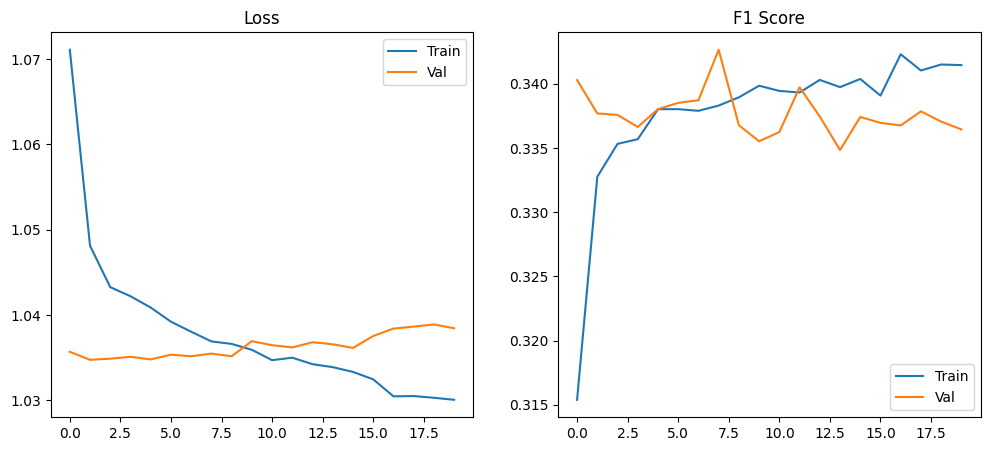

In [4]:
# --- 4. Plotting ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_f1'], label='Train')
plt.plot(history['val_f1'], label='Val')
plt.title('F1 Score')
plt.legend()
plt.savefig('training_curves.png')
plt.show()

In [5]:
# --- 5. Submission ---
model.eval()
predictions = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()
        predictions.extend(preds.cpu().numpy().flatten())

submission = pd.DataFrame({'ProfileID': test_profile_ids, 'RiskFlag': np.array(predictions).astype(int)})
submission.to_csv('submission.csv', index=False)
print("Saved submission.csv")

Saved submission.csv


In [6]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --- 1. Define Focal Loss (Better for Imbalanced Data) ---
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=True, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        else:
            BCE_loss = nn.functional.binary_cross_entropy(inputs, targets, reduction='none')
        
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

# --- 2. Enhanced Model (Wider & Deeper with LeakyReLU) ---
class LoanRiskNN_Enhanced(nn.Module):
    def __init__(self, input_dim):
        super(LoanRiskNN_Enhanced, self).__init__()
        self.model = nn.Sequential(
            # Input Block
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),
            
            # Hidden Block 1
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),
            
            # Hidden Block 2
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3),
            
            # Hidden Block 3
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.1),
            
            # Output
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# --- 3. Setup Training with Improvements ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LoanRiskNN_Enhanced(input_dim=X_train.shape[1]).to(device)

# Using Focal Loss instead of standard BCE
# alpha=0.25 is often good balance, gamma=2 focuses on hard examples
criterion = FocalLoss(alpha=0.25, gamma=2.0).to(device)

# Optimizer with slightly lower start LR but using scheduler
optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

EPOCHS = 30 # Increased slightly

print(f"\nTraining Enhanced Model on {device}...")

best_val_f1 = 0
best_model_state = None

history = {'train_loss': [], 'val_loss': [], 'train_f1': [], 'val_f1': []}

for epoch in range(EPOCHS):
    # --- TRAINING ---
    model.train()
    running_loss = 0.0
    all_preds = []
    all_targets = []
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        
        # Track metrics (using default 0.5 for now, will tune later)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
        
    epoch_train_loss = running_loss / len(train_loader.dataset)
    epoch_train_f1 = f1_score(all_targets, all_preds)
    
    # --- VALIDATION ---
    model.eval()
    val_running_loss = 0.0
    val_preds_probs = [] # Store probabilities for threshold tuning
    val_targets_list = []
    
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            val_running_loss += loss.item() * inputs.size(0)
            
            probs = torch.sigmoid(outputs)
            val_preds_probs.extend(probs.cpu().numpy())
            val_targets_list.extend(targets.cpu().numpy())
            
    epoch_val_loss = val_running_loss / len(val_loader.dataset)
    
    # Calculate F1 at default 0.5 for logging
    val_preds_default = (np.array(val_preds_probs) > 0.5).astype(int)
    epoch_val_f1 = f1_score(val_targets_list, val_preds_default)
    
    # Step the scheduler based on Validation F1
    scheduler.step(epoch_val_f1)
    
    # Save best model
    if epoch_val_f1 > best_val_f1:
        best_val_f1 = epoch_val_f1
        best_model_state = model.state_dict()
    
    history['train_loss'].append(epoch_train_loss)
    history['val_loss'].append(epoch_val_loss)
    history['train_f1'].append(epoch_train_f1)
    history['val_f1'].append(epoch_val_f1)
    
    print(f"Epoch {epoch+1:02d} | Train Loss: {epoch_train_loss:.4f} | Val F1 (0.5 thresh): {epoch_val_f1:.4f} | LR: {optimizer.param_groups[0]['lr']:.5f}")

# Restore best model
if best_model_state:
    model.load_state_dict(best_model_state)

print("\nFinding Optimal Threshold...")
model.eval()
val_probs = []
val_true = []

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        val_probs.extend(probs.cpu().numpy().flatten())
        val_true.extend(targets.cpu().numpy().flatten())

val_probs = np.array(val_probs)
val_true = np.array(val_true)

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for thresh in thresholds:
    preds = (val_probs > thresh).astype(int)
    score = f1_score(val_true, preds)
    f1_scores.append(score)

best_f1 = max(f1_scores)
best_thresh = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best Validation F1 Score: {best_f1:.4f}")




model.eval()
test_preds = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        # USE THE OPTIMIZED THRESHOLD HERE
        preds = (probs > best_thresh).float() 
        test_preds.extend(preds.cpu().numpy().flatten())

submission = pd.DataFrame({
    'ProfileID': test_profile_ids,
    'RiskFlag': np.array(test_preds).astype(int)
})
submission.to_csv('submission_enhanced.csv', index=False)
print("Saved submission_enhanced.csv")

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Training Enhanced Model on cuda...
Epoch 01 | Train Loss: 0.0224 | Val F1 (0.5 thresh): 0.1646 | LR: 0.00500
Epoch 02 | Train Loss: 0.0211 | Val F1 (0.5 thresh): 0.1358 | LR: 0.00500
Epoch 03 | Train Loss: 0.0211 | Val F1 (0.5 thresh): 0.0658 | LR: 0.00500
Epoch 04 | Train Loss: 0.0210 | Val F1 (0.5 thresh): 0.1350 | LR: 0.00500
Epoch 05 | Train Loss: 0.0210 | Val F1 (0.5 thresh): 0.0402 | LR: 0.00250
Epoch 06 | Train Loss: 0.0209 | Val F1 (0.5 thresh): 0.1705 | LR: 0.00250
Epoch 07 | Train Loss: 0.0209 | Val F1 (0.5 thresh): 0.1376 | LR: 0.00250
Epoch 08 | Train Loss: 0.0209 | Val F1 (0.5 thresh): 0.1301 | LR: 0.00250
Epoch 09 | Train Loss: 0.0209 | Val F1 (0.5 thresh): 0.1180 | LR: 0.00250
Epoch 10 | Train Loss: 0.0209 | Val F1 (0.5 thresh): 0.1178 | LR: 0.00125
Epoch 11 | Train Loss: 0.0208 | Val F1 (0.5 thresh): 0.1213 | LR: 0.00125
Epoch 12 | Train Loss: 0.0208 | Val F1 (0.5 thresh): 0.1290 | LR: 0.00125
Epoch 13 | Train Loss: 0.0209 | Val F1 (0.5 thresh): 0.1183 | LR: 0.00125
Ep